# Understanding Mall customers

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the owner of a Mall and he wants to understand the customers who can easily buy.  

You dispose of a dataset from the mall dataset with 5 features :
- CustomerID of the customer
- Gender of the customer
- Age of the customer
- Annual Income of the customer in k$
- Spending Score assigned by the mall based on customer behavior and spending nature (1-99)


You have one day to perform this analysis

In [1]:
import pandas as pd
import numpy as np

In [8]:
mall_df = pd.read_csv('../data/mail_customer.txt')
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Customer Segmentation using different clustering methods

Try to perform different Clustering methods (e.g. k-means, agglomerative, DBSCAN, Gaussian) to create clusters and understand behaviors

https://machinelearningmastery.com/clustering-algorithms-with-python/

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

#### DBSCAN

In [163]:
# Libraries
from numpy import unique
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [157]:
# Create copy of initial dataframe
df_dbscan = mall_df.copy()

In [158]:
# Need to change Gender column, because it's a categorical column
df_dbscan['Gender'] = df_dbscan['Gender'].replace({'Female':1, 'Male':0})
# scaler = StandardScaler()
# df_dbscan_test = scaler.fit_transform(df_dbscan[['Age','Annual Income (k$)','Spending Score (1-100)']])
# df_dbscan_test = df_dbscan[['Annual Income (k$)','Spending Score (1-100)']]
# df_dbscan[['Age','Annual Income (k$)','Spending Score (1-100)']] = df_dbscan_test
df_dbscan

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [161]:
scaler = StandardScaler()
df_dbscan_test = scaler.fit_transform(df_dbscan[['Age','Annual Income (k$)','Spending Score (1-100)']])
df_dbscan[['Age','Annual Income (k$)','Spending Score (1-100)']] = df_dbscan_test
df_dbscan

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,-1.424569,-1.738999,-0.434801
1,2,0,-1.281035,-1.738999,1.195704
2,3,1,-1.352802,-1.700830,-1.715913
3,4,1,-1.137502,-1.700830,1.040418
4,5,1,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,196,1,-0.276302,2.268791,1.118061
196,197,1,0.441365,2.497807,-0.861839
197,198,0,-0.491602,2.497807,0.923953
198,199,0,-0.491602,2.917671,-1.250054


0.3981440725158191


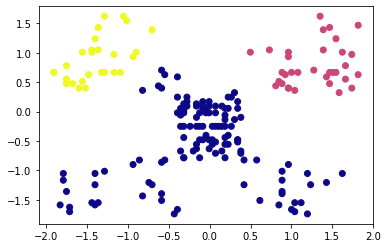

In [162]:
X = df_dbscan.iloc[:, [3, 4]].values
X

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.37,min_samples=4)

# Fitting the model

model=dbscan.fit(X)

labels=model.labels_

from numpy import unique

# unique(labels)

df_dbscan['cluster'] = labels

df_dbscan[df_dbscan['cluster'] >= 0]

plt.scatter(data=df_dbscan[df_dbscan['cluster']>=0], x='Spending Score (1-100)', y='Annual Income (k$)', c='cluster', cmap="plasma")



#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)



print(metrics.silhouette_score(X,labels))

In [165]:
df_dbscan

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,0,-1.424569,-1.738999,-0.434801,0
1,2,0,-1.281035,-1.738999,1.195704,0
2,3,1,-1.352802,-1.700830,-1.715913,0
3,4,1,-1.137502,-1.700830,1.040418,0
4,5,1,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...,...,...
195,196,1,-0.276302,2.268791,1.118061,-1
196,197,1,0.441365,2.497807,-0.861839,-1
197,198,0,-0.491602,2.497807,0.923953,-1
198,199,0,-0.491602,2.917671,-1.250054,-1


<AxesSubplot:xlabel='cluster', ylabel='Age'>

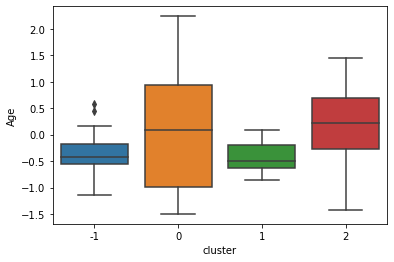

In [166]:
sns.boxplot(x='cluster', y='Age', data=df_dbscan)

<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

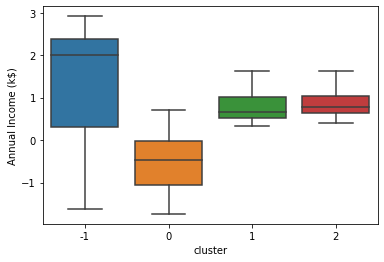

In [169]:
sns.boxplot(x='cluster', y='Annual Income (k$)', data=df_dbscan)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

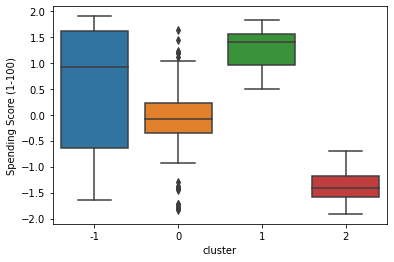

In [170]:
sns.boxplot(x='cluster', y='Spending Score (1-100)', data=df_dbscan)

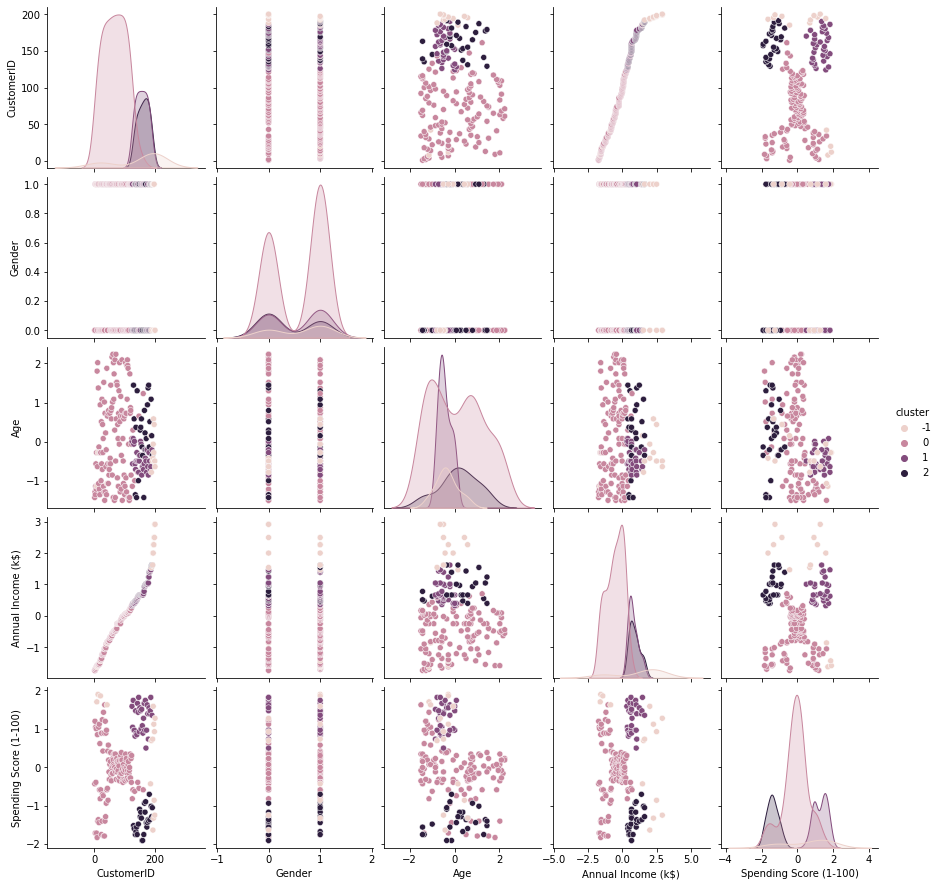

In [155]:
sns.pairplot(df_dbscan, hue='cluster')

# Conclusions